<h1><center>Data Characteristics M3-Competition</center></h1>

### Config

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import adfuller
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

### Data

In [36]:
y_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M3 Data/M3_yearly_processed.parquet')

q_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M3 Data/M3_quarter_processed.parquet')

m_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M3 Data/M3_month_processed.parquet')

In [37]:
y_df['Category'] = y_df['Category'].str.strip()
q_df['Category'] = q_df['Category'].str.strip()
m_df['Category'] = m_df['Category'].str.strip()

In [38]:
q_df.drop(columns='Measurement', inplace=True)

In [39]:
m_df.drop(columns='Measurement', inplace=True)

In [40]:
concatenated_df = pd.concat([y_df, q_df, m_df])

sorted_df = concatenated_df.sort_values(by=["Series", "Date"])

## Visualizations and Summary Statistics for All Data

#### One obs that is negative

In [41]:
concatenated_df.loc[concatenated_df['Value'] < 0]

,Series,N,NF,Category,Value,Date
164146,2786,96,18,OTHER,-1200.0,1879-12-01


### Boxplot distribution of values

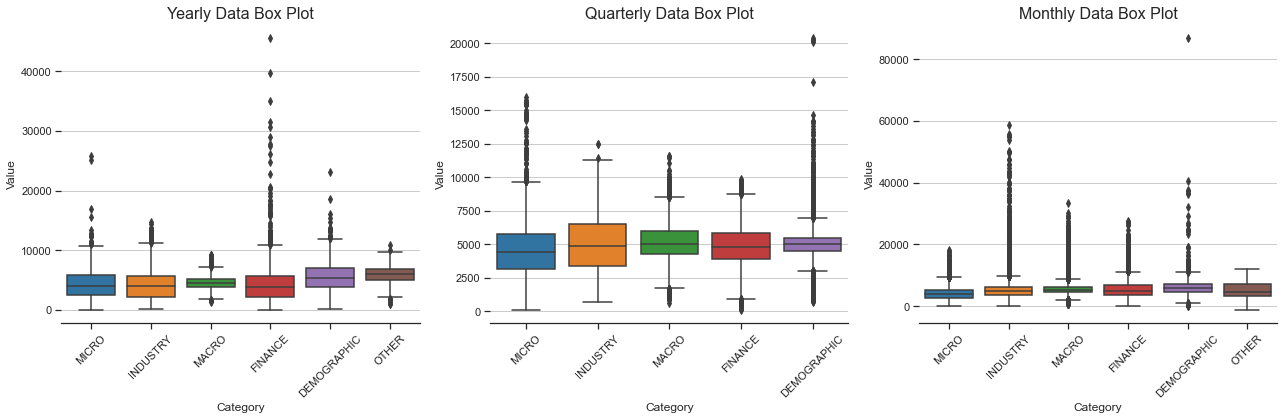

In [42]:
# Set the aesthetic style of the plots
sns.set_style("ticks")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Yearly Data Plot
sns.boxplot(ax=axes[0], x='Category', y='Value', data=y_df)
axes[0].set_title('Yearly Data Box Plot', fontsize = 16)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Value')
axes[0].grid(axis='y')  
axes[0].tick_params(axis='x', rotation=45)  

# Quarterly Data Plot
sns.boxplot(ax=axes[1], x='Category', y='Value', data=q_df)
axes[1].set_title('Quarterly Data Box Plot', fontsize = 16)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Value')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=45)

# Monthly Data Plot
sns.boxplot(ax=axes[2], x='Category', y='Value', data=m_df)
axes[2].set_title('Monthly Data Box Plot', fontsize = 16)
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Value')
axes[2].grid(axis='y')
axes[2].tick_params(axis='x', rotation=45)

# Removing the left spine from all plots
sns.despine(left=True)

# Display the plot
plt.tight_layout()  
plt.show()

### Summary Statistics

In [43]:
category_counts_y = concatenated_df['Category'].loc[concatenated_df['NF'] == 6].value_counts()

category_counts_q = concatenated_df['Category'].loc[concatenated_df['NF'] == 8].value_counts()

category_counts_m = concatenated_df['Category'].loc[concatenated_df['NF'] == 18].value_counts()

data = {
    'Yearly': category_counts_y,
    'Quarterly': category_counts_q,
    'Monthly': category_counts_m
}

# The dictionary keys are column names, and the values are the series
category_counts_df = pd.DataFrame(data)


category_counts_df = category_counts_df.fillna(0).astype(int)  


category_counts_df = category_counts_df.sort_values(by='Yearly', ascending=False)
latex_table = category_counts_df.to_latex(index=True, header=True, column_format='lccc', 
                                          caption='Distribution of Categories Across Time Intervals', 
                                          label='tab:category_counts',
                                          bold_rows=True)
print(latex_table)

\begin{table}
\caption{Distribution of Categories Across Time Intervals}
\label{tab:category_counts}
\begin{tabular}{lccc}
\toprule
 & Yearly & Quarterly & Monthly \\
Category &  &  &  \\
\midrule
\textbf{DEMOGRAPHIC} & 6669 & 3168 & 13690 \\
\textbf{INDUSTRY} & 4355 & 4985 & 46767 \\
\textbf{MICRO} & 2920 & 8977 & 43917 \\
\textbf{FINANCE} & 2068 & 3935 & 18038 \\
\textbf{MACRO} & 1903 & 15939 & 40835 \\
\textbf{OTHER} & 404 & 0 & 4315 \\
\bottomrule
\end{tabular}
\end{table}



In [44]:
df_y = concatenated_df.loc[concatenated_df['NF'] == 6].copy()

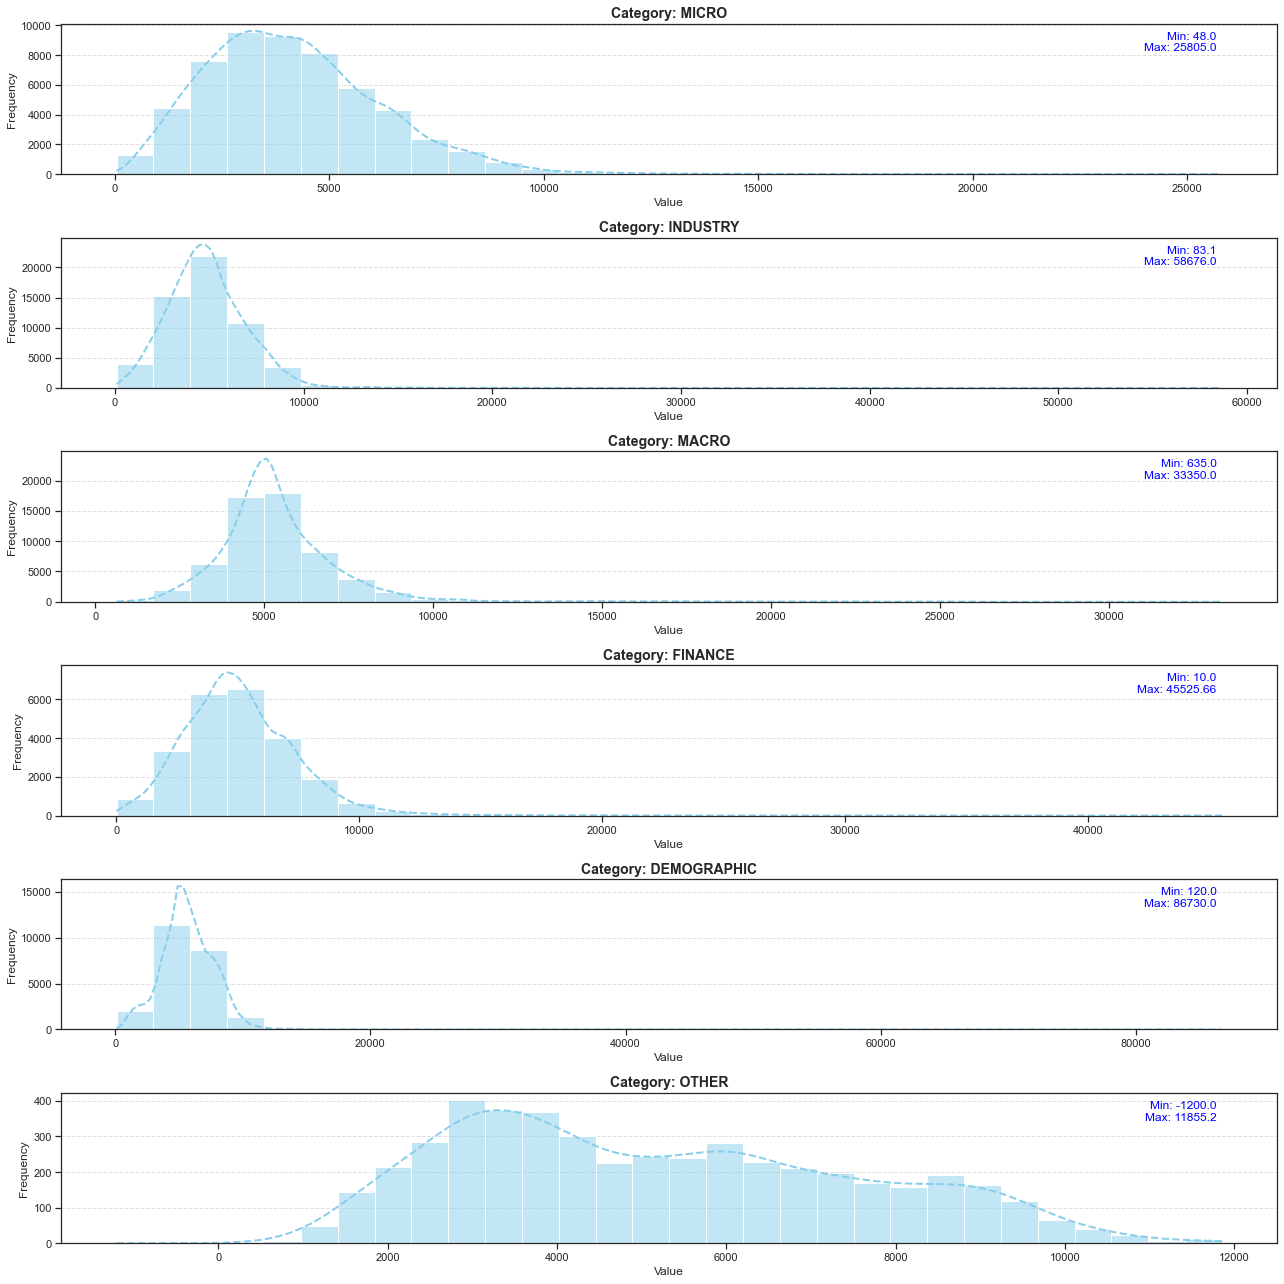

In [66]:
categories = concatenated_df['Category'].unique()

plt.figure(figsize=(18, 18))
for i, category in enumerate(categories, 1):
    plt.subplot(len(categories), 1, i)
    data = concatenated_df[concatenated_df['Category'] == category]['Value']

    # Plot the histogram with KDE
    sns.histplot(data, kde=True, color='skyblue', bins=30, line_kws={'color': 'red', 'lw': 2, 'linestyle': '--'})
    plt.title(f'Category: {category}', fontsize=14, fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Get min and max values
    data_min = data.min()
    data_max = data.max()
    
    # Add text annotation for min and max values
    plt.text(0.95, 0.95, f'Min: {data_min}\nMax: {data_max}', transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right', fontsize=12, color='blue')

plt.tight_layout()
plt.show()


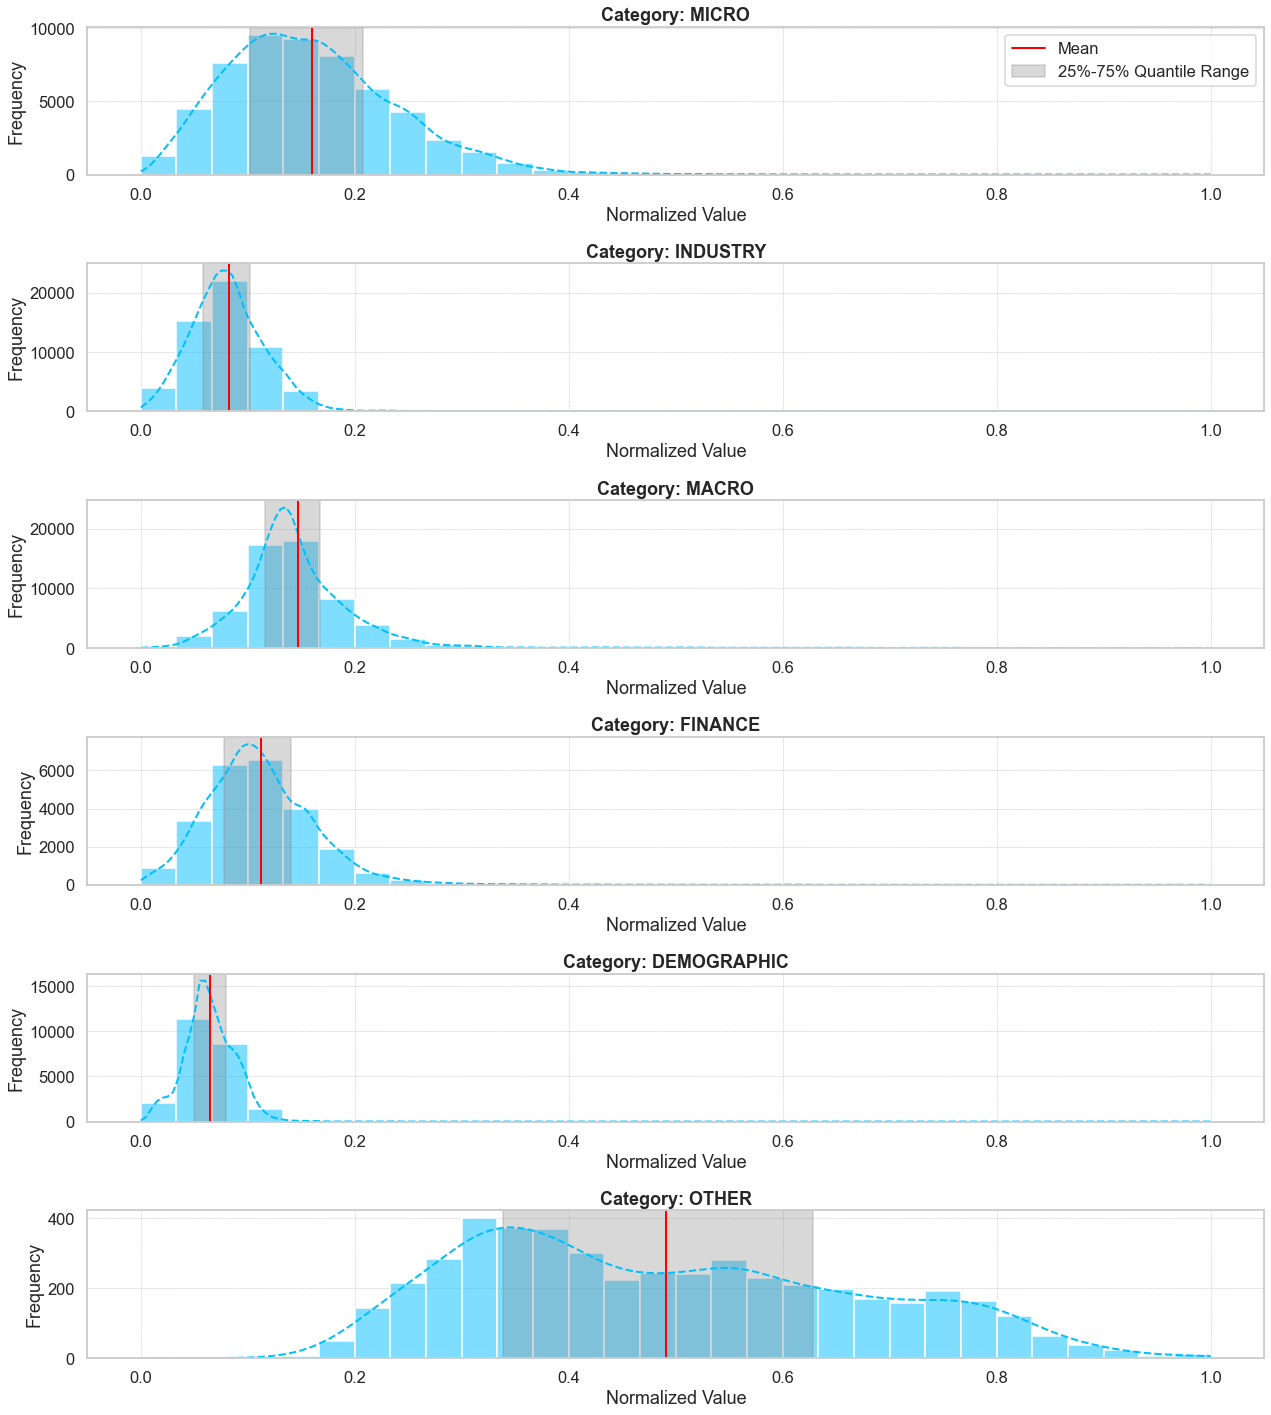

In [75]:
# Set style for better readability and presentation
sns.set(style='whitegrid', context='talk')


categories = concatenated_df['Category'].unique()

plt.figure(figsize=(18, 20))
for i, category in enumerate(categories, 1):
    ax = plt.subplot(len(categories), 1, i)
    data = concatenated_df[concatenated_df['Category'] == category]['Value']
    
    # Normalize data
    data_normalized = (data - data.min()) / (data.max() - data.min())

    # Plot the histogram with KDE
    sns.histplot(data_normalized, kde=True, color='deepskyblue', bins=30, line_kws={'color': 'navy', 'lw': 2, 'linestyle': '--'})
    
    # Calculate mean and quantiles
    mean_value = data_normalized.mean()
    quantile_25 = data_normalized.quantile(0.25)
    quantile_75 = data_normalized.quantile(0.75)

    # Add a vertical line for the mean
    plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label='Mean')

    # Add shaded area between the 25% and 75% quantiles
    plt.axvspan(quantile_25, quantile_75, color='grey', alpha=0.3, label='25%-75% Quantile Range')
    
    plt.title(f'Category: {category}', fontweight='bold')
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')

    # Adding legend
    if i == 1:  # Add legend to only the first plot to avoid repetition
        ax.legend()

    # Customizing the grid
    plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


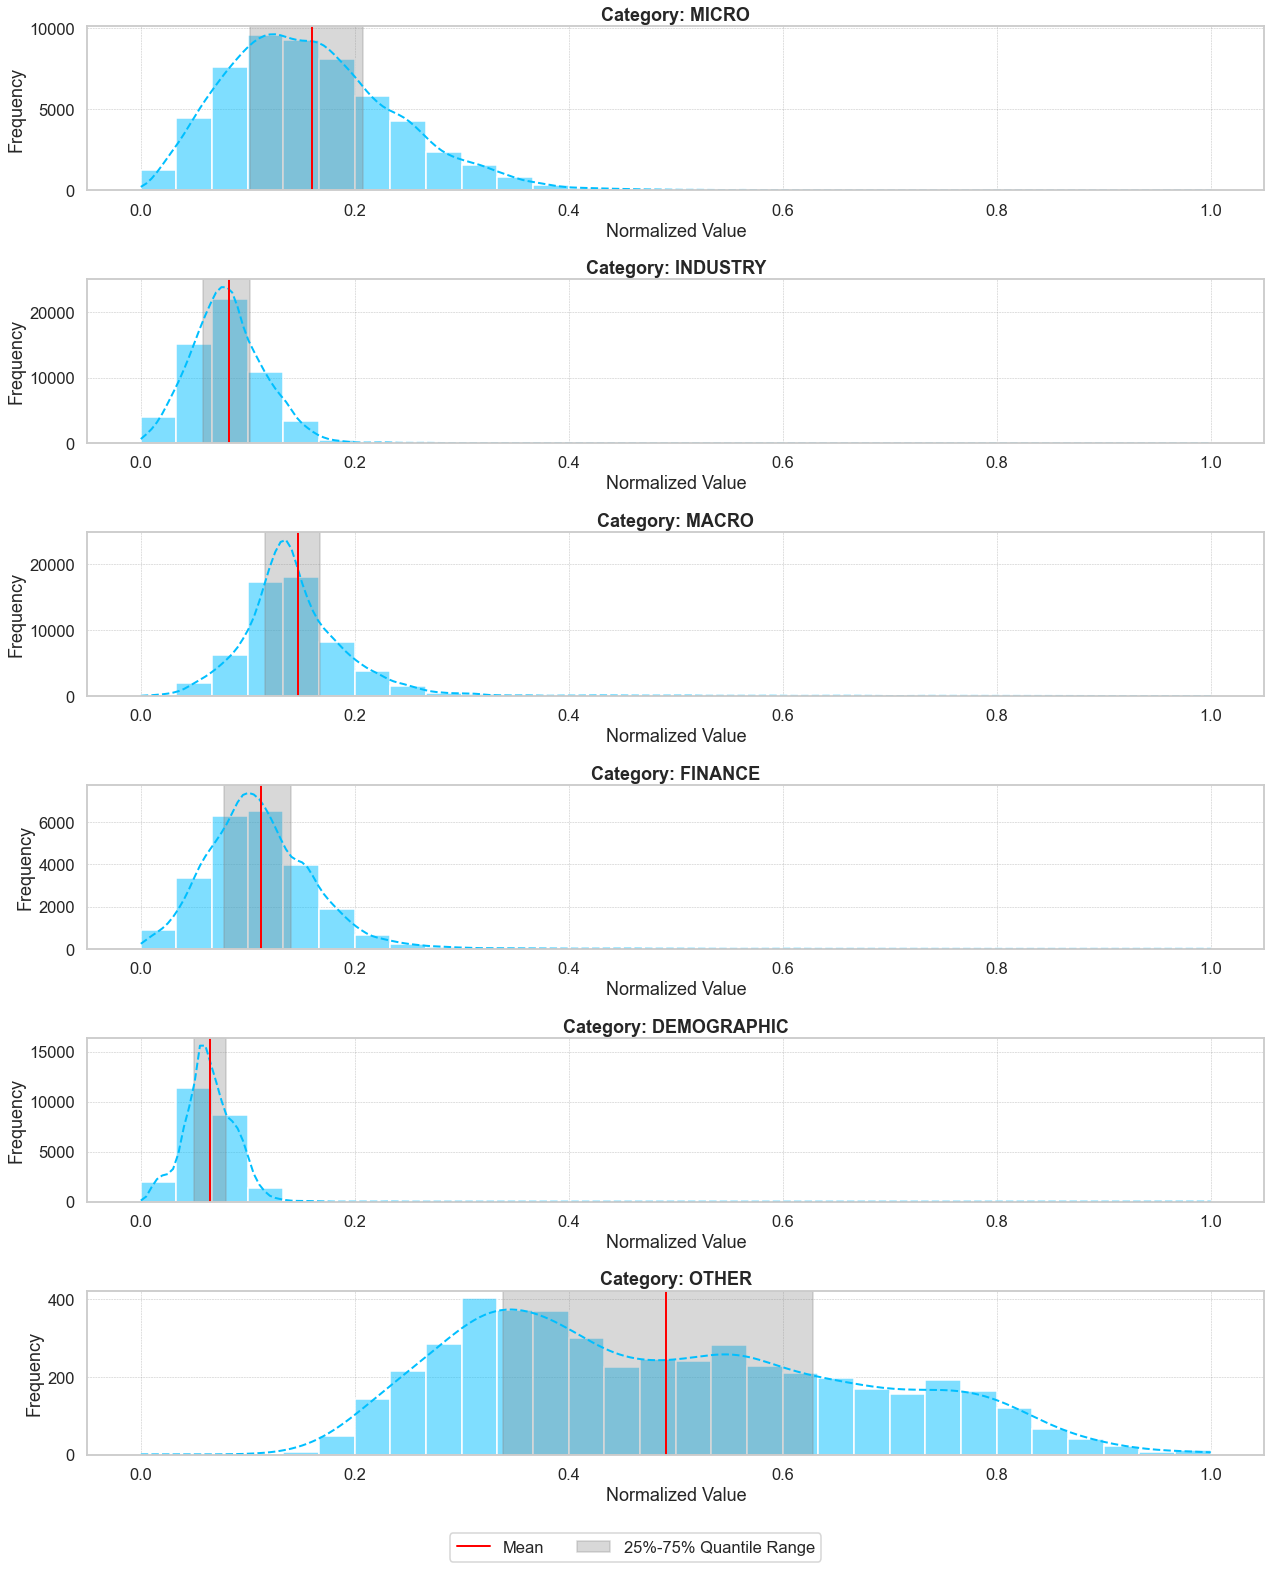

In [76]:
sns.set(style='whitegrid', context='talk')

categories = concatenated_df['Category'].unique()

# Prepare the figure
plt.figure(figsize=(18, 22))  # Slightly increase the figure size to accommodate the legend
for i, category in enumerate(categories, 1):
    ax = plt.subplot(len(categories), 1, i)
    data = concatenated_df[concatenated_df['Category'] == category]['Value']
    
    # Normalize data
    data_normalized = (data - data.min()) / (data.max() - data.min())

    # Plot the histogram with KDE
    sns.histplot(data_normalized, kde=True, color='deepskyblue', bins=30, line_kws={'color': 'navy', 'lw': 2, 'linestyle': '--'})
    
    # Calculate mean and quantiles
    mean_value = data_normalized.mean()
    quantile_25 = data_normalized.quantile(0.25)
    quantile_75 = data_normalized.quantile(0.75)

    # Add a vertical line for the mean
    plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label='Mean')

    # Add shaded area between the 25% and 75% quantiles
    plt.axvspan(quantile_25, quantile_75, color='grey', alpha=0.3, label='25%-75% Quantile Range')
    
    plt.title(f'Category: {category}', fontweight='bold')
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')

    # Customizing the grid
    plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Place the legend at the bottom of the plots
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=2, frameon=True)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the rectangle in which to fit the subplots
plt.show()


In [95]:
# Mapping NF values to frequencies
frequency_mapping = {
    6: 'Yearly',
    8: 'Quarterly',
    18: 'Monthly'
}

# Apply the mapping to create a new column for frequency
concatenated_df['Frequency'] = concatenated_df['NF'].map(frequency_mapping)



summary_stats = concatenated_df.groupby(['Category', 'Frequency'])['Value'].agg(
    min='min',
    quantile_25=lambda x: x.quantile(0.25),
    mean='mean',
    quantile_75=lambda x: x.quantile(0.75),
    max='max'
).reset_index()

In [96]:
summary_stats

,Category,Frequency,min,quantile_25,mean,quantile_75,max
0,DEMOGRAPHIC,Monthly,120.0,4706.0000,5971.101779,7257.250,86730.00
1,DEMOGRAPHIC,Quarterly,720.0,4524.1225,5114.141436,5507.545,20375.00
2,DEMOGRAPHIC,Yearly,170.8,3832.0000,5456.840279,7052.700,23103.30
3,FINANCE,Monthly,10.0,3643.6500,5265.747675,6663.050,27505.00
4,FINANCE,Quarterly,121.0,3875.0000,4871.713914,5820.825,9903.33
5,FINANCE,Yearly,30.0,2175.9000,4352.190769,5642.040,45525.66
6,INDUSTRY,Monthly,90.0,3600.0000,4966.402190,6050.000,58676.00
7,INDUSTRY,Quarterly,680.0,3350.0000,5055.660933,6541.590,12465.00
8,INDUSTRY,Yearly,83.1,2144.7500,4118.872705,5764.000,14710.40
9,MACRO,Monthly,635.0,4545.0000,5568.177330,6212.375,33350.00


In [97]:
summary_stats.set_index(['Frequency', 'Category'], inplace=True)

# Sorting the index to make the table readable
summary_stats.sort_index(inplace=True)

# Format numeric columns with thousand separators
for col in summary_stats.select_dtypes(include=['float', 'int']):
    summary_stats[col] = summary_stats[col].apply(lambda x: f'{x:,.2f}')

latex_output = summary_stats.to_latex(
    column_format='llrrrrrr', 
    multirow=True,
    multicolumn=True,
    multicolumn_format='c',
    escape=False,
    index_names=True,
    header=True
)

print(latex_output)

\begin{tabular}{llrrrrrr}
\toprule
 &  & min & quantile_25 & mean & quantile_75 & max \\
Frequency & Category &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{Monthly} & DEMOGRAPHIC & 120.00 & 4,706.00 & 5,971.10 & 7,257.25 & 86,730.00 \\
 & FINANCE & 10.00 & 3,643.65 & 5,265.75 & 6,663.05 & 27,505.00 \\
 & INDUSTRY & 90.00 & 3,600.00 & 4,966.40 & 6,050.00 & 58,676.00 \\
 & MACRO & 635.00 & 4,545.00 & 5,568.18 & 6,212.38 & 33,350.00 \\
 & MICRO & 100.00 & 2,600.00 & 4,082.09 & 5,260.00 & 18,100.00 \\
 & OTHER & -1,200.00 & 3,160.00 & 5,149.64 & 7,001.90 & 11,855.20 \\
\cline{1-7}
\multirow[t]{5}{*}{Quarterly} & DEMOGRAPHIC & 720.00 & 4,524.12 & 5,114.14 & 5,507.55 & 20,375.00 \\
 & FINANCE & 121.00 & 3,875.00 & 4,871.71 & 5,820.82 & 9,903.33 \\
 & INDUSTRY & 680.00 & 3,350.00 & 5,055.66 & 6,541.59 & 12,465.00 \\
 & MACRO & 650.00 & 4,267.68 & 5,178.98 & 5,976.80 & 11,601.60 \\
 & MICRO & 126.00 & 3,141.00 & 4,589.06 & 5,764.40 & 15,973.00 \\
\cline{1-7}
\multirow[t]{6}{*}{Yearly} & DEMOGR

#### Stationarity

In [102]:
def test_stationarity(time_series):
    """ Applies the Augmented Dickey-Fuller test and returns whether the series is stationary. """
    result = adfuller(time_series, autolag='AIC')
    return result[1]  # Return p-value

# Calculate stationarity for each series
stationary_count = 0
non_stationary_count = 0

# Iterate over each unique series in the DataFrame
for series_id in concatenated_df['Series'].unique():
    series_data = concatenated_df[concatenated_df['Series'] == series_id]['Value']
    p_value = test_stationarity(series_data)
    
    # Evaluate stationarity based on the p-value
    if p_value < 0.05:
        stationary_count += 1
    else:
        non_stationary_count += 1

print(f"Number of stationary series: {stationary_count}")
print(f"Number of non-stationary series: {non_stationary_count}")


Number of stationary series: 488
Number of non-stationary series: 2341
